In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# set seaborn theme
sns.set_theme()

# set seaborn style
sns.set_style("whitegrid")

# set seaborn palette
sns.set_palette("colorblind")

import glob
import json
import os

In [2]:
# load data from data/*.json 
data = []

for fname in glob.glob('data/*.json'):    
    with open(fname) as f:
        d = json.load(f)
        d['filename'] = './'+fname
        data.append(d)
    
df = pd.json_normalize(data)
df

,task,date,filename,trace.events,config.model,config.max_steps,config.temperature,config.scenario,analysis.attempted_invocations,analysis.successful_invocations,...,analysis.completed,analysis.reached_accepting_state,analysis.termination_message,analysis.tool_stats.success_count.Mixing,analysis.tool_stats.success_count.Closet,analysis.tool_stats.success_count.Serving,analysis.final_state_name,analysis.tool_stats.success_count.Conclude,analysis.tool_stats.success_count.SandboxedPython,analysis.tool_stats.error_count.Closet
0,Make me a cereal bowl with milk,2023-05-02T05:28:46.745759216+00:00,./data/trial_2642050184937150078.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,10,10,...,False,False,None,7,1.0,2.0,BowlNoCerealNoMilk,NaN,NaN,NaN
1,Make me a cereal bowl with milk,2023-05-02T05:33:07.582458337+00:00,./data/trial_3163777853370104334.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,10,10,...,False,False,None,6,4.0,NaN,BowlNoCerealNoMilk,NaN,NaN,NaN
2,Make me a cereal bowl with milk,2023-05-02T05:36:32.411813376+00:00,./data/trial_13688065184754275263.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,6,6,...,True,True,The cereal bowl with milk has been served.,2,3.0,1.0,Served,1.0,NaN,NaN
3,Make me a cereal bowl with milk,2023-05-02T05:22:17.831939675+00:00,./data/trial_11889673524587721747.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,5,5,...,True,False,Here is your cereal bowl with milk. Enjoy!,2,3.0,NaN,BowlWithMilk,1.0,NaN,NaN
4,Make me a cereal bowl with milk,2023-05-02T05:29:32.884868543+00:00,./data/trial_9306510466970876901.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,4,4,...,True,False,The bowl is not ready for serving. Please prep...,2,1.0,1.0,BowlNoCerealNoMilk,1.0,NaN,NaN
5,Make me a cereal bowl with milk,2023-05-02T05:20:25.785204429+00:00,./data/trial_18168063838686562425.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,7,7,...,True,False,Here is your cereal bowl with milk.,3,2.0,NaN,BowlNoCerealNoMilk,1.0,2.0,NaN
6,Make me a cereal bowl with milk,2023-05-02T05:26:11.908104089+00:00,./data/trial_999788888533304615.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,10,9,...,False,False,None,6,2.0,1.0,BowlNoCerealNoMilk,NaN,NaN,NaN
7,Make me a cereal bowl with milk,2023-05-02T05:35:16.611532341+00:00,./data/trial_3149691295752804932.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,6,6,...,True,True,Here is your cereal bowl with milk. Enjoy!,2,3.0,1.0,Served,1.0,NaN,NaN
8,Make me a cereal bowl with milk,2023-05-02T05:37:57.722109971+00:00,./data/trial_3944461635560674556.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,5,4,...,True,False,The cereal bowl was made with milk but was not...,1,2.0,1.0,NoMilkBowlWithCereal,1.0,NaN,1.0
9,Make me a cereal bowl with milk,2023-05-02T05:20:55.968280012+00:00,./data/trial_7667944056249177161.json,[{'Start': {'task': 'Make me a cereal bowl wit...,gpt-3.5-turbo,10,0.0,Scenario0,1,1,...,True,False,We could not make the cereal bowl with milk si...,1,NaN,NaN,NoBowlNoCerealNoMilk,1.0,NaN,NaN


In [3]:
df.set_index(['config.scenario', 'task', 'filename'], inplace=True)

Text(0, 0.5, 'count')

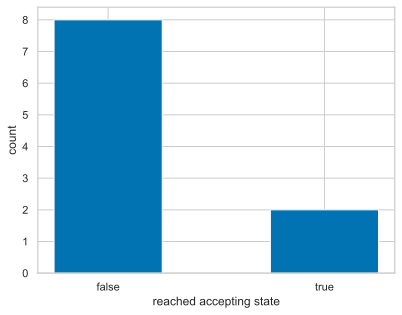

In [4]:
# plot histogram of reached accepting state - center bars
df['analysis.reached_accepting_state'].astype(float).hist(bins=2, align='mid', rwidth=0.5)
# false/true labels
plt.xticks([0.25, 0.75], ['false', 'true'])
plt.xlabel('reached accepting state')
plt.ylabel('count')


In [5]:
df

date   
config.scenario task                            filename                                                                      
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json   2023-05-02T05:28:46.745759216+00:00  \
                                                ./data/trial_3163777853370104334.json   2023-05-02T05:33:07.582458337+00:00   
                                                ./data/trial_13688065184754275263.json  2023-05-02T05:36:32.411813376+00:00   
                                                ./data/trial_11889673524587721747.json  2023-05-02T05:22:17.831939675+00:00   
                                                ./data/trial_9306510466970876901.json   2023-05-02T05:29:32.884868543+00:00   
                                                ./data/trial_18168063838686562425.json  2023-05-02T05:20:25.785204429+00:00   
                                                ./data/trial_999788888533304615.json    2023-05-02T05:26:11.908104089+00:00   
                                                ./data/trial_3149691295752804932.json   2023-05-02T05:35:16.611532341+00:00   
                                                ./data/trial_3944461635560674556.json   2023-05-02T05:37:57.722109971+00:00   
                                                ./data/trial_7667944056249177161.json   2023-05-02T05:20:55.968280012+00:00   

                                                                                                                             trace.events   
config.scenario task                            filename                                                                                    
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json   [{'Start': {'task': 'Make me a cereal bowl wit...  \
                                                ./data/trial_3163777853370104334.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_13688065184754275263.json  [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_11889673524587721747.json  [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_9306510466970876901.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_18168063838686562425.json  [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_999788888533304615.json    [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_3149691295752804932.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_3944461635560674556.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_7667944056249177161.json   [{'Start': {'task': 'Make me a cereal bowl wit...   

                                                                                         config.model   
config.scenario task                            filename                                                
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json   gpt-3.5-turbo  \
                                                ./data/trial_3163777853370104334.json   gpt-3.5-turbo   
                                                ./data/trial_13688065184754275263.json  gpt-3.5-turbo   
                                                ./data/trial_11889673524587721747.json  gpt-3.5-turbo   
                                                ./data/trial_9306510466970876901.json   gpt-3.5-turbo   
                                                ./data/trial_18168063838686562425.json  gpt-3.5-turbo   
                                                ./data/trial_

<Axes: xlabel='analysis.tokens.prompt_tokens', ylabel='analysis.tokens.completion_tokens'>

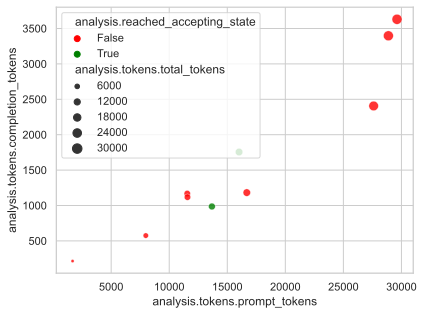

In [6]:
# scatterplot with analysis.tokens.prompt_tokens as x-axis and 
# analysis.tokens.completion_tokens as y-axis  
# analysis.reached_accepting_state as color - True: green, False: red
# analysis.tokens.total_tokens as size

sns.scatterplot(
    data=df,
    x='analysis.tokens.prompt_tokens',
    y='analysis.tokens.completion_tokens',
    hue='analysis.reached_accepting_state',
    size='analysis.tokens.total_tokens',
    sizes=(10, 100),
    alpha=0.8,
    palette=['red', 'green'],
)




In [7]:
# find the states the model reached
failed_trials_df = df[df['analysis.reached_accepting_state'] == False]
failed_trials_df

date   
config.scenario task                            filename                                                                      
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json   2023-05-02T05:28:46.745759216+00:00  \
                                                ./data/trial_3163777853370104334.json   2023-05-02T05:33:07.582458337+00:00   
                                                ./data/trial_11889673524587721747.json  2023-05-02T05:22:17.831939675+00:00   
                                                ./data/trial_9306510466970876901.json   2023-05-02T05:29:32.884868543+00:00   
                                                ./data/trial_18168063838686562425.json  2023-05-02T05:20:25.785204429+00:00   
                                                ./data/trial_999788888533304615.json    2023-05-02T05:26:11.908104089+00:00   
                                                ./data/trial_3944461635560674556.json   2023-05-02T05:37:57.722109971+00:00   
                                                ./data/trial_7667944056249177161.json   2023-05-02T05:20:55.968280012+00:00   

                                                                                                                             trace.events   
config.scenario task                            filename                                                                                    
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json   [{'Start': {'task': 'Make me a cereal bowl wit...  \
                                                ./data/trial_3163777853370104334.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_11889673524587721747.json  [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_9306510466970876901.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_18168063838686562425.json  [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_999788888533304615.json    [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_3944461635560674556.json   [{'Start': {'task': 'Make me a cereal bowl wit...   
                                                ./data/trial_7667944056249177161.json   [{'Start': {'task': 'Make me a cereal bowl wit...   

                                                                                         config.model   
config.scenario task                            filename                                                
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json   gpt-3.5-turbo  \
                                                ./data/trial_3163777853370104334.json   gpt-3.5-turbo   
                                                ./data/trial_11889673524587721747.json  gpt-3.5-turbo   
                                                ./data/trial_9306510466970876901.json   gpt-3.5-turbo   
                                                ./data/trial_18168063838686562425.json  gpt-3.5-turbo   
                                                ./data/trial_999788888533304615.json    gpt-3.5-turbo   
                                                ./data/trial_3944461635560674556.json   gpt-3.5-turbo   
                                                ./data/trial_7667944056249177161.json   gpt-3.5-turbo   

                                                                                        config.max_steps   
config.scenario task                            filename                                                   
Scenario0       Make me a cereal bowl with milk ./data/trial_2642050184937150078.json                 10  \
                                                ./data/trial_3

In [8]:
# pick the first failed trial
failed_trial_filename = failed_trials_df.reset_index().iloc[0]['filename']
failed_trial_filename

'./data/trial_2642050184937150078.json'

In [9]:
df_filename = df.reset_index()
df_filename.set_index('filename', inplace=True)

df_filename.loc[failed_trial_filename]

config.scenario                                                                              Scenario0
task                                                                   Make me a cereal bowl with milk
date                                                               2023-05-02T05:28:46.745759216+00:00
trace.events                                         [{'Start': {'task': 'Make me a cereal bowl wit...
config.model                                                                             gpt-3.5-turbo
config.max_steps                                                                                    10
config.temperature                                                                                 0.0
analysis.attempted_invocations                                                                      10
analysis.successful_invocations                                                                     10
analysis.tokens.prompt_tokens                                            

In [10]:
for evt in df_filename.loc[failed_trial_filename]['trace.events']:
    keys = list(evt.keys())

    if keys[0] == 'Start':
        print(f"==== [start] task: {evt['Start']}")
    elif keys[0] == 'End':        
        if 'Concluded' in evt['End'].keys():
            print(f"==== [end] conclusion = {evt['End']['Concluded']['conclusion']}")
        else:
            print(f"==== [end] reason = {evt['End']}")
    elif keys[0] == 'ToolInvocationSucceeded':
        print(f"====[tool] tool = {evt['ToolInvocationSucceeded']['tool_name']}")
        print("==[tool] input = \n", evt['ToolInvocationSucceeded']['tool_input'])
        result = evt['ToolInvocationSucceeded']['result']        
        print("keys = ", list(result.keys()))
        if 'Success' in list(result.keys()):
            print("==[tool] success =\n", result['Success']['output'])
        else:
            print("==[tool] failure =\n", result)        
    elif keys[0] == 'ToolInvocationFailed':
        print(f"====[tool] tool = {evt['ToolInvocationSucceeded']['tool_name']}")
        print("==[tool] input = \n", evt['ToolInvocationSucceeded']['tool_input']) 
        print("==[tool] error = \n", evt['ToolInvocationSucceeded']['error'])
    else:
        print("====unknown event")

    print('------')
       


==== [start] task: {'task': 'Make me a cereal bowl with milk'}
------
====[tool] tool = Mixing
==[tool] input = 
 ## Observations:
- We have an instruction to make a cereal bowl with milk.
## Orientation:
- I can use the Mixing Tool to complete the task.
- I need to provide the `tool_name` and `input` fields for the Mixing Tool.
- The Serveable object for the Mixing Tool is Bowl.
- The Pourable object for the Mixing Tool are Cereal and Milk.
- I expect the result of the Action to contain the field 'added' with 'True' value and the field 'object' with 'Milk' value.
- I need to use the Conclude Tool to terminate the task once complete.
## Decision:
- Mix cereal and milk in a bowl.
## The ONLY Action:
```yaml
tool_name: Mixing
input:
  container: Bowl
  pourable: Milk
```
keys =  ['Success']
==[tool] success =
 # Action Mixing result: 
```yaml
added: false
```
# Your turn
Original question: Make me a cereal bowl with milk
Do you have the answer? Use the Conclude Tool to terminate the task

AttributeError: 'str' object has no attribute 'keys'